# Elevazione 20 - 17 febbraio 2023

In [8]:
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd

import scipy
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import norm

In [4]:
dati = pd.read_csv ('dati/elevazione_20.csv')
dati['data_ora'] = pd.to_datetime(dati.data_ora)

In [5]:
data_m = pd.to_datetime('2023-02-17 04:56:00', format = '%Y-%m-%d %H:%M:%S')

a_1 = dati.data_ora <= data_m
a_2 = dati.data_ora >= data_m

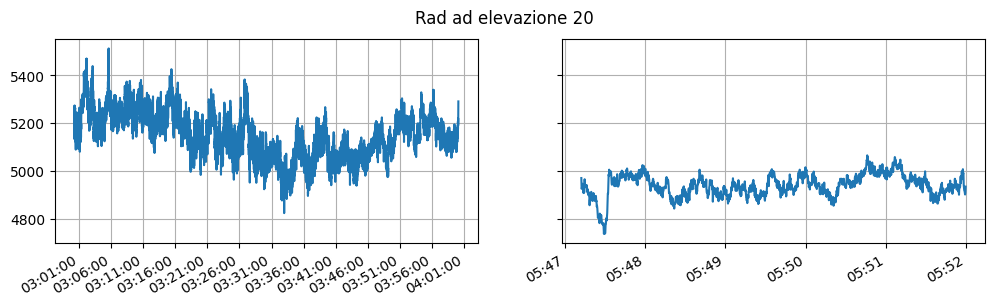

In [6]:
fig, axs = plt.subplots(1,2, sharey=True)
fig.suptitle('Rad ad elevazione 20')
fig.autofmt_xdate()
fig.set_size_inches(12, 3)

axs[0].plot(dati['data_ora'][a_1],dati['rad'][a_1], label='temp')
axs[0].xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
axs[0].xaxis.set_major_locator(MinuteLocator(interval = 5))
axs[0].grid()

axs[1].plot(dati['data_ora'][a_2],dati['rad'][a_2], label='temp')
axs[1].xaxis.set_major_formatter(DateFormatter('%H:%M'))
axs[1].xaxis.set_major_locator(MinuteLocator(interval = 1))
axs[1].grid()

plt.savefig('grafici/20/completo.png')
plt.show()

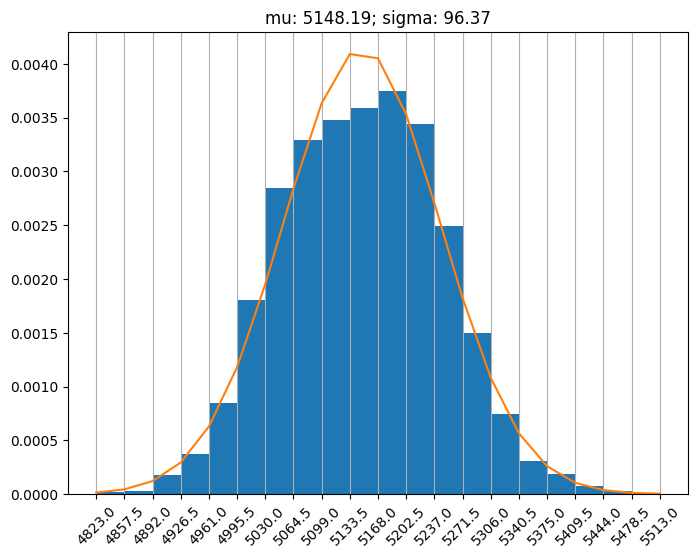

In [9]:
fig_1 = plt.figure(figsize=(8,6))

n, bins, patches = plt.hist(dati['rad'][a_1], density=1, bins=20)
mu_up, sigma_up = scipy.stats.norm.fit(dati['rad'][a_1])
best_fit_line = scipy.stats.norm.pdf(bins, mu_up, sigma_up)
plt.plot(bins, best_fit_line)

plt.xticks(bins)
plt.xticks(rotation = 45)
plt.gca().xaxis.grid(True)
title = "mu: {:.2f}; sigma: {:.2f}".format(mu_up, sigma_up)
plt.title(title)

plt.savefig('grafici/20/up.png', dpi=300)
plt.show()

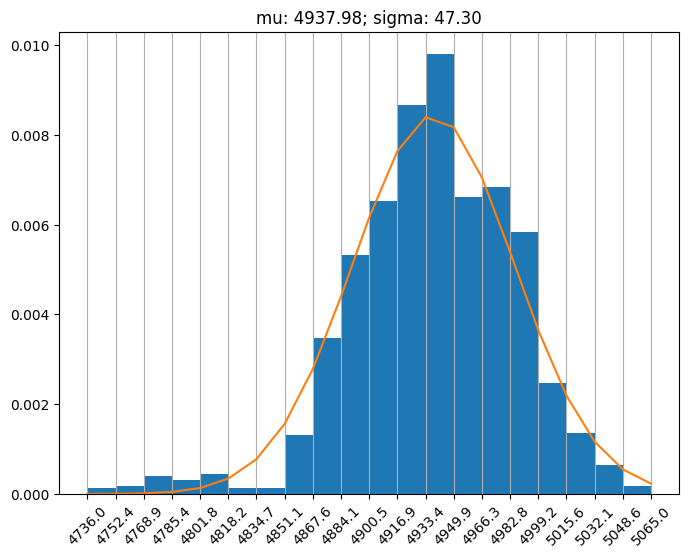

In [10]:
fig_2 = plt.figure(figsize=(8,6))

n_1, bins_1, patches_1 = plt.hist(dati['rad'][a_2], density=1, bins=20)
mu_down, sigma_down = scipy.stats.norm.fit(dati['rad'][a_2])
fit_line = scipy.stats.norm.pdf(bins_1, mu_down, sigma_down)
plt.plot(bins_1, fit_line)

plt.xticks(bins_1)
plt.xticks(rotation = 45)
plt.gca().xaxis.grid(True)
title_1 = "mu: {:.2f}; sigma: {:.2f}".format(mu_down, sigma_down)
plt.title(title_1)

plt.savefig('grafici/20/down.png',dpi=300)
plt.show()

In [ ]:
# for x in dati[a_2].index:
#     if dati['rad'][x] < 4851.1:
#         dati = dati.drop(labels=x, axis=0)